## DATA LOADING

In [1]:
import os
import glob
import pandas as pd

def load_data(folder_names, root_path):
    doc_list = []
    tags = folder_names
    
    for folder in folder_names:
        folder_path = os.path.join(root_path, folder)
        file_names = glob.glob(os.path.join(folder_path, "*.txt"))
        
        for file_path in file_names:
            with open(file_path, encoding="latin-1") as f:
                lines = f.readlines()
                heading = lines[0].strip()  # Stripping the text by spaces and using the first element as the heading
                body = ' '.join([l.strip() for l in lines[1:]])
                doc_list.append([folder, heading, body])
        
        print(f"Loading data from \033[1m{folder}\033[0m directory")
    
    print("\nEntire Data is loaded successfully")
    return doc_list

# Define the folder names corresponding to the different categories
folder_names = ['business', 'entertainment', 'politics', 'sport', 'tech']

# Define the root path to the 'News Articles' folder
root_path = r'C:\Users\Administrator\Desktop\NLP\archive\BBC News Summary\News Articles'

# Call the load_data function to load the dataset
dataset = load_data(folder_names, root_path)

# Convert the list of lists into a Pandas DataFrame
df = pd.DataFrame(dataset, columns=['category', 'heading', 'body'])

# Check how many values are in each category
tags_values = df['category'].value_counts()
print(tags_values)


Loading data from business directory
Loading data from entertainment directory
Loading data from politics directory
Loading data from sport directory
Loading data from tech directory

Entire Data is loaded successfully
sport            511
business         510
politics         417
tech             401
entertainment    386
Name: category, dtype: int64


In [2]:
df

,category,heading,body
0,business,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...
1,business,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...
2,business,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...
3,business,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...
4,business,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...
...,...,...,...
2220,tech,BT program to beat dialler scams,BT is introducing two initiatives to help bea...
2221,tech,Spam e-mails tempt net shoppers,Computer users across the world continue to i...
2222,tech,Be careful how you code,A new European directive could put software w...
2223,tech,US cyber security chief resigns,The man making sure US computer networks are ...


In [3]:
df.shape

(2225, 3)

### ANALYSING THE DATA 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  2225 non-null   object
 1   heading   2225 non-null   object
 2   body      2225 non-null   object
dtypes: object(3)
memory usage: 52.3+ KB


In [5]:
first_row = df.iloc[0]
print(first_row)

category                                             business
heading                     Ad sales boost Time Warner profit
body         Quarterly profits at US media giant TimeWarne...
Name: 0, dtype: object


In [6]:
df.isnull().sum()

category    0
heading     0
body        0
dtype: int64

## DATA CLEANING

In [7]:
df.duplicated().sum()

98

In [8]:

df.drop_duplicates(inplace=True)

In [9]:
df.duplicated().sum()

0

In [10]:
df.shape

(2127, 3)

## EDA

In [11]:
df.head()

,category,heading,body
0,business,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...
1,business,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...
2,business,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...
3,business,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...
4,business,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...


In [12]:
df['category'].value_counts()

sport            505
business         503
politics         403
entertainment    369
tech             347
Name: category, dtype: int64

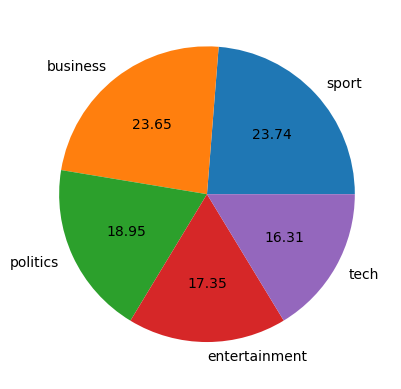

In [14]:
import matplotlib.pyplot as plt
plt.pie(df['category'].value_counts(), labels=['sport','business','politics','entertainment','tech'],autopct="%0.2f")
plt.show()

## DATA PREPROCESSING
 

In [8]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Download the required NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Step 1: Convert to lowercase
df['heading'] = df['heading'].str.lower()
df['body'] = df['body'].str.lower()

# Step 2: Tokenize the strings into individual words
df['heading'] = df['heading'].apply(word_tokenize)
df['body'] = df['body'].apply(word_tokenize)

# Step 3: Remove punctuation and stopwords
stop_words = set(stopwords.words('english'))

def remove_punctuation_and_stopwords(tokens):
    return [token for token in tokens if token.isalpha() and token not in stop_words]

df['heading'] = df['heading'].apply(remove_punctuation_and_stopwords)
df['body'] = df['body'].apply(remove_punctuation_and_stopwords)

# Step 4: Apply stemming (you can also use lemmatization if needed)
stemmer = PorterStemmer()

def apply_stemming(tokens):
    return [stemmer.stem(token) for token in tokens]

df['heading'] = df['heading'].apply(apply_stemming)
df['body'] = df['body'].apply(apply_stemming)

print(df)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


      category                                  heading  \
0     business  [ad, sale, boost, time, warner, profit]   
1     business        [dollar, gain, greenspan, speech]   
2     business   [yuko, unit, buyer, face, loan, claim]   
3     business     [high, fuel, price, hit, ba, profit]   
4     business     [pernod, takeov, talk, lift, domecq]   
...        ...                                      ...   
2219      tech      [new, consol, promis, big, problem]   
2220      tech       [bt, program, beat, dialler, scam]   
2222      tech                             [care, code]   
2223      tech        [us, cyber, secur, chief, resign]   
2224      tech                      [lose, onlin, game]   

                                                   body  
0     [quarterli, profit, us, media, giant, timewarn...  
1     [dollar, hit, highest, level, euro, almost, th...  
2     [owner, embattl, russian, oil, giant, yuko, as...  
3     [british, airway, blame, high, fuel, price, dr...  
4

In [9]:
df

,category,heading,body
0,business,"[ad, sale, boost, time, warner, profit]","[quarterli, profit, us, media, giant, timewarn..."
1,business,"[dollar, gain, greenspan, speech]","[dollar, hit, highest, level, euro, almost, th..."
2,business,"[yuko, unit, buyer, face, loan, claim]","[owner, embattl, russian, oil, giant, yuko, as..."
3,business,"[high, fuel, price, hit, ba, profit]","[british, airway, blame, high, fuel, price, dr..."
4,business,"[pernod, takeov, talk, lift, domecq]","[share, uk, drink, food, firm, alli, domecq, r..."
...,...,...,...
2219,tech,"[new, consol, promis, big, problem]","[make, game, futur, consol, requir, graphic, a..."
2220,tech,"[bt, program, beat, dialler, scam]","[bt, introduc, two, initi, help, beat, rogu, d..."
2222,tech,"[care, code]","[new, european, direct, could, put, softwar, w..."
2223,tech,"[us, cyber, secur, chief, resign]","[man, make, sure, us, comput, network, safe, s..."


In [10]:
df['heading'][1]

['dollar', 'gain', 'greenspan', 'speech']

#### After preprocessing it is in list format so changing into string format

In [11]:
# Convert lists in 'heading' column back to strings
df['heading'] = df['heading'].apply(lambda words: ' '.join(words))

# Convert lists in 'body' column back to strings
df['body'] = df['body'].apply(lambda words: ' '.join(words))

In [12]:
df

,category,heading,body
0,business,ad sale boost time warner profit,quarterli profit us media giant timewarn jump ...
1,business,dollar gain greenspan speech,dollar hit highest level euro almost three mon...
2,business,yuko unit buyer face loan claim,owner embattl russian oil giant yuko ask buyer...
3,business,high fuel price hit ba profit,british airway blame high fuel price drop prof...
4,business,pernod takeov talk lift domecq,share uk drink food firm alli domecq risen spe...
...,...,...,...
2219,tech,new consol promis big problem,make game futur consol requir graphic artist m...
2220,tech,bt program beat dialler scam,bt introduc two initi help beat rogu dialler s...
2222,tech,care code,new european direct could put softwar writer r...
2223,tech,us cyber secur chief resign,man make sure us comput network safe secur res...


### SPLITTING THE DATA

In [13]:
X = df.iloc[:,1:3]
y = df['category']

In [14]:
X

,heading,body
0,ad sale boost time warner profit,quarterli profit us media giant timewarn jump ...
1,dollar gain greenspan speech,dollar hit highest level euro almost three mon...
2,yuko unit buyer face loan claim,owner embattl russian oil giant yuko ask buyer...
3,high fuel price hit ba profit,british airway blame high fuel price drop prof...
4,pernod takeov talk lift domecq,share uk drink food firm alli domecq risen spe...
...,...,...
2219,new consol promis big problem,make game futur consol requir graphic artist m...
2220,bt program beat dialler scam,bt introduc two initi help beat rogu dialler s...
2222,care code,new european direct could put softwar writer r...
2223,us cyber secur chief resign,man make sure us comput network safe secur res...


In [15]:
y

0       business
1       business
2       business
3       business
4       business
          ...   
2219        tech
2220        tech
2222        tech
2223        tech
2224        tech
Name: category, Length: 2127, dtype: object

#### we are converting y column which has business ,tech, etc categories to numbers as machine cants understand text

In [23]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

y = encoder.fit_transform(y)

In [24]:
y

array([0, 0, 0, ..., 4, 4, 4])

In [ ]:
print("Class Label\tEncoded Integer")
print("----------------------------")
for label, encoded in zip(y, y_encoded):
    print(f"{label}\t\t{encoded}")

## MODEL BUILDING 

In [18]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [19]:
X = tfidf.fit_transform(df['body']).toarray()

In [20]:
X.shape

(2127, 18563)

In [25]:
y

array([0, 0, 0, ..., 4, 4, 4])

## TRAIN TEST SPLIT

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

## USING DIIFERENT ML ALGO 

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier


In [1]:
from sklearn.svm import SVC
svc = SVC(kernel='sigmoid', gamma=1.0)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
print(accuracy)
print(precision)

In [28]:
pip install xgboost

     ---------------------------------------- 70.9/70.9 MB 7.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [30]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [31]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [33]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [40]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    current_accuracy = accuracy_score(y_test, y_pred)
    current_precision = precision_score(y_test, y_pred, average='macro') # or average='micro', 'weighted', or None
    
    print("For ", name)
    print("Accuracy - ", current_accuracy)
    print("Precision - ", current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)


For  SVC
Accuracy -  0.9788732394366197
Precision -  0.97901086771999
For  KN
Accuracy -  0.9436619718309859
Precision -  0.9408116766527467
For  NB
Accuracy -  0.9624413145539906
Precision -  0.9641361573869313
For  DT
Accuracy -  0.6150234741784038
Precision -  0.7620168389793689
For  LR
Accuracy -  0.9366197183098591
Precision -  0.9394055288619094
For  RF
Accuracy -  0.9366197183098591
Precision -  0.9419393781893781
For  AdaBoost
Accuracy -  0.7723004694835681
Precision -  0.809081253648414
For  BgC
Accuracy -  0.892018779342723
Precision -  0.889844919059738
For  ETC
Accuracy -  0.9460093896713615
Precision -  0.9478895843484244
For  GBDT
Accuracy -  0.9483568075117371
Precision -  0.9479307817860262
For  xgb
Accuracy -  0.9577464788732394
Precision -  0.9576722587095023


In [41]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [42]:
performance_df

,Algorithm,Accuracy,Precision
0,SVC,0.978873,0.979011
2,NB,0.962441,0.964136
10,xgb,0.957746,0.957672
9,GBDT,0.948357,0.947931
8,ETC,0.946009,0.947890
5,RF,0.936620,0.941939
1,KN,0.943662,0.940812
4,LR,0.936620,0.939406
7,BgC,0.892019,0.889845
6,AdaBoost,0.772300,0.809081


## PLOTTING BAR 

In [43]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1

,Algorithm,variable,value
0,SVC,Accuracy,0.978873
1,NB,Accuracy,0.962441
2,xgb,Accuracy,0.957746
3,GBDT,Accuracy,0.948357
4,ETC,Accuracy,0.946009
5,RF,Accuracy,0.936620
6,KN,Accuracy,0.943662
7,LR,Accuracy,0.936620
8,BgC,Accuracy,0.892019
9,AdaBoost,Accuracy,0.772300


In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

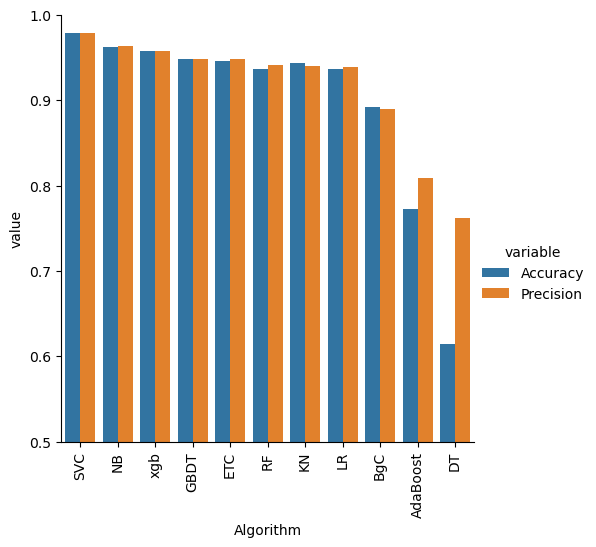

In [48]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [49]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
xgb = XGBClassifier(n_estimators=50,random_state=2)

from sklearn.ensemble import VotingClassifier

In [ ]:
from sklearn.svm import SVC
svc = SVC(kernel='sigmoid', gamma=1.0)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
print(accuracy)
print(precision)

In [50]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('xgb', xgb)],voting='soft')

In [51]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            gpu_id=Non...icy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=50, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=2, ...))],
                 voting='soft')

In [54]:
from sklearn.metrics import accuracy_score, precision_score

y_pred = voting.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision (macro):", precision_score(y_test, y_pred, average='macro'))


Accuracy: 0.9882629107981221
Precision (macro): 0.9876093461774953


In [55]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('xgb', xgb)]
final_estimator=RandomForestClassifier()

In [56]:
from sklearn.ensemble import StackingClassifier

In [57]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [58]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision (macro):", precision_score(y_test, y_pred, average='macro'))

Accuracy 0.9812206572769953
Precision (macro): 0.980464581139055


In [ ]:
## 

In [59]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(voting,open('model.pkl','wb'))